<table class="ee-notebook-buttons" align="left"><td>
<a target="_blank"  href="https://colab.research.google.com/github/biagiominio/Remote_sensing_2021/blob/main/R_code_variability.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a>
</td><td>
<a target="_blank"  href="https://github.com/biagiominio/Remote_sensing_2021/blob/main/R_code_variability.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a></td></table>

# Similaun glacier
To learn the techniques for visualizing spatial variability, use Sentinel images of the Similaun and Ortles glaciers in Italy. This region is important not only for its rich geobiodiversity but also for its fascinating archaeological history, also due to an incredible anthropological discovery of the early 1990s: the famous Tyrolean ice man Ötzi.

DATA: Copernicus Sentinel-2A with a spatial resolution of 10m and acquired on May 9th 2020.

The Copernicus Sentinel-2 image used in this document can be downloaded for free from [Copernicus Open Access Hub](https://scihub.copernicus.eu/), image box reference: S2A_MSIL2A_20200905T101031_N0214_R022_T32TPS_20200905T130252

## Install R packages
The [install.packages](https://www.rdocumentation.org/packages/utils/versions/3.6.2/topics/install.packages) function is used to download and install packages from CRAN-like repositories.
To install multiple packages at the same time, you define a vector that contains the names of the packages to be installed.

The [raster](https://www.rdocumentation.org/packages/raster/versions/3.4-10) package defines classes and methods for spatial raster data access and manipulation. 

[RStoolbox](https://www.rdocumentation.org/packages/RStoolbox/versions/0.2.6) is an package providing a wide range of tools for your every-day remote sensing processing needs. The available tool-set covers many aspects for remote sensing image processing and analysis such as calculating spectral indices, principal component transformation, unsupervised and supervised classification or fractional cover analyses.

The [ggplot2](https://www.rdocumentation.org/packages/ggplot2/versions/3.3.3) package is a system for declaratively creating graphics. 
It provides a more programmatic interface for specifying what variables to plot, how they are displayed, and general visual properties. 

While the [gridExtra](https://www.rdocumentation.org/packages/gridExtra/versions/2.3/topics/gridExtra-package) package provides a number of user-level functions to work with "grid" graphics, notably to arrange multiple grid-based plots on a page, and draw tables.

In [ ]:
packages <- c("raster", "RStoolbox", "ggplot2", "gridExtra", "viridis")
install.packages(packages)

The [library](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/library) function is used to load previously installed packages.
Using the [lapply](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/lapply) function we simultaneously apply the `library()` function to all elements of the vector containing the packages.



In [ ]:
lapply(packages , library, character.only = TRUE)

## Reading spatial data
To read and view a multilevel object it is common to use the [brick](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/brick) function (RasterBrick object). 

Explore the properties of the `similaun_glacier` object.



In [6]:
similaun_glacier <- brick("/content/sentinel.png")

The brick object has three bands that correspond to the following portions of the electromagnetic spectrum:

$\mathsf{B1}$ = Near Infrared; 
$\mathsf{B2}$ = Red;
$\mathsf{B3}$ = Green;

Change the names of a raster object using the [names](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/names) function.


In [14]:
names(similaun_glacier) <- c("nir", "red", "green", "NA")
similaun_glacier

class      : RasterBrick 
dimensions : 794, 798, 633612, 4  (nrow, ncol, ncell, nlayers)
resolution : 1, 1  (x, y)
extent     : 0, 798, 0, 794  (xmin, xmax, ymin, ymax)
crs        : NA 
source     : sentinel.png 
names      : nir, red, green, NA. 
min values :   0,   0,     0,   0 
max values : 255, 255,   255, 255 


## Visualization of spatial data
Several generic functions have been implemented for "raster" objects to create maps and other plot types. For example, use [plot](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/plot) function to create a map of a raster object.
In addition, individual bands can be combined into a single image by assigning individual layers or bands to one of the three color channels (red, green and blue). 
The [plotRGB](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/plotRGB) function can be used to make "true (or false) color images" from multi-band satellite images.

Use the [par](https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/par) function to compare the images of Mato Grosso over the two different years.
Export the image using the [pdf](https://www.rdocumentation.org/packages/grDevices/versions/3.6.2/topics/pdf) function to enlarge it better and view the results.

N.B. always use the `dev.off()` function to manage the correct closing and loading of the graphics device.


In [ ]:
# pdf(file = "/content/Similaun.pdf")
par(mfrow=c(1,2))
plotRGB(similaun_glacier, r=1, g=2, b=3, stretch="lin")
plotRGB(similaun_glacier, r=2, g=1, b=3, stretch="lin")
dev.off()

## Normalized difference vegetation index (NDVI)
Vegetation indices are designed to maximize sensitivity to the vegetation characteristics while minimizing confounding factors such as soil background reflectance, directional, or atmospheric effects.
The most commonly used vegetation indices utilize the information contained in the red and near-infrared (NIR) canopy reflectances or radiances.

Surely among the most used vegetation indices, the NDVI represents a good measure of healthy and green vegetation.
The combination of its normalized difference formulation and use of the highest absorption and reflectance regions of chlorophyll make it robust over a wide range of conditions. 
It can, however, saturate in dense vegetation conditions when LAI (Leaf Area Index) becomes high.

$$NDVI=\frac{NIR-RED}{NIR+RED}$$

The value of this index ranges from −1 to 1. The common range for green vegetation is 0.2–0.8.

In [ ]:
similaun_glacier.ndvi <- (similaun_glacier$nir - similaun_glacier$red)/(similaun_glacier$nir + similaun_glacier$red)
plot(similaun_glacier.ndvi)

Use function [colorRampPalette](https://www.rdocumentation.org/packages/dichromat/versions/1.1/topics/colorRampPalette) to create a continuous color scale divided into n-levels.


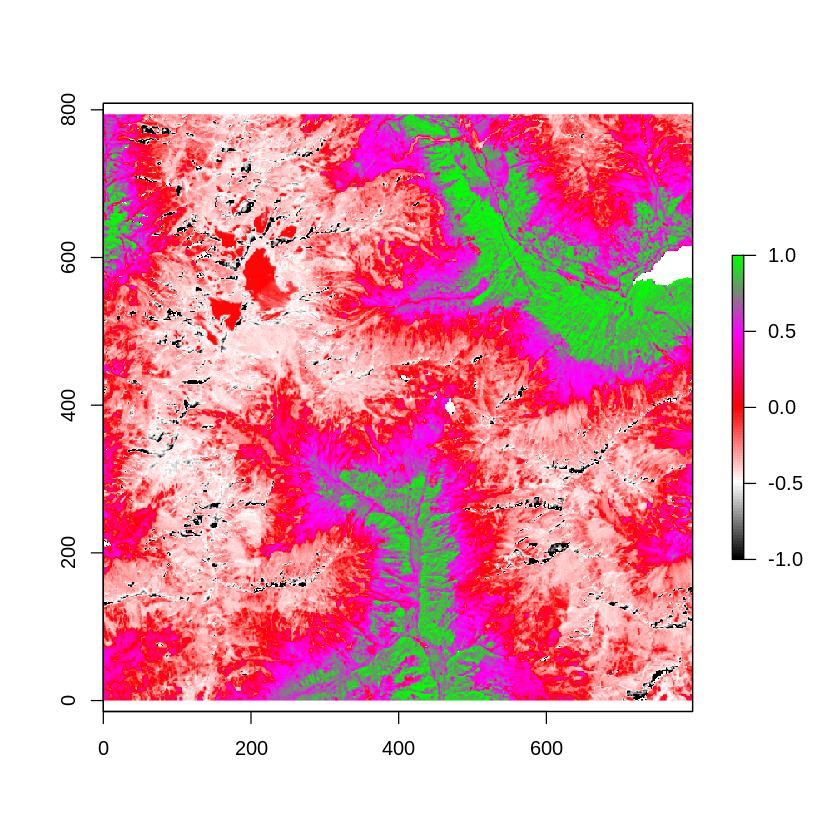

In [17]:
cl <- colorRampPalette(c('black','white','red','magenta','green'))(100)
plot(similaun_glacier.ndvi,col=cl)

## Moving window

### Standard deviation

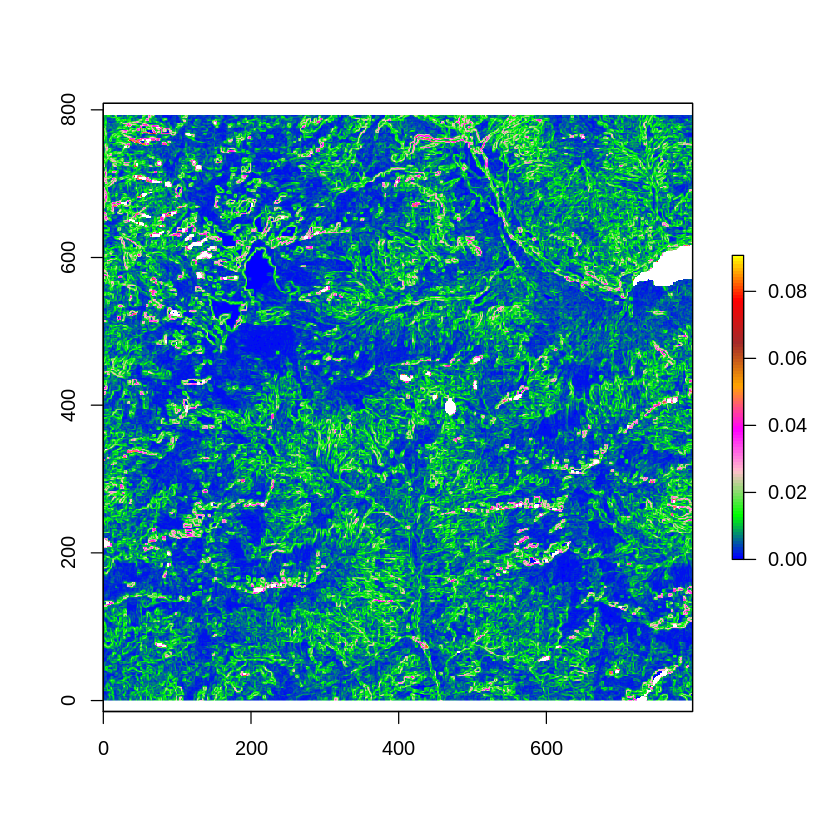

In [25]:
similaun_glacier.ndvi.sd3 <- focal(similaun_glacier.ndvi, w=matrix(1/9, nrow=3, ncol=3), fun=sd)
cl_sd <- colorRampPalette(c('blue','green','pink','magenta','orange','brown','red','yellow'))(100) 
plot(similaun_glacier.ndvi.sd3, col=cl_sd)

### Mean

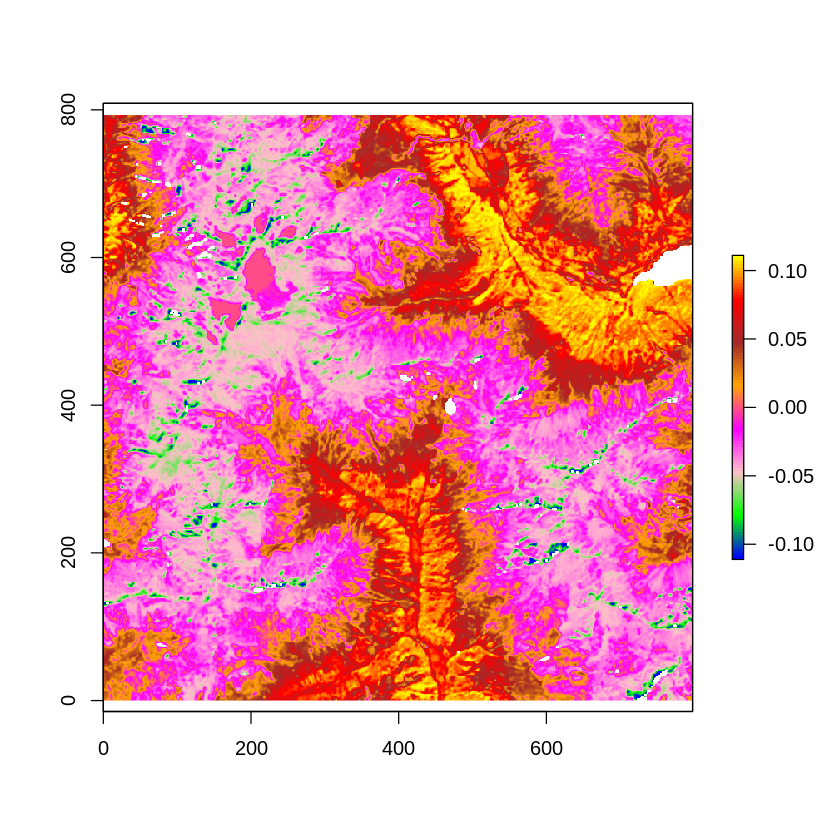

In [24]:
# mean ndvi with focal
similaun_glacier.ndvi.mean3 <- focal(similaun_glacier.ndvi, w=matrix(1/9, nrow=3, ncol=3), fun=mean)
cl_sd <- colorRampPalette(c('blue','green','pink','magenta','orange','brown','red','yellow'))(100) 
plot(similaun_glacier.ndvi.mean3, col=cl_sd)

## Principal Component Analysis

In multispectral or multidimensional remote sensing data, a different degree of correlation between the bands is often observed. This may depend on real factors, such as the physical nature of the observed surfaces, the width of the spectral band, the noise inherent in the data.
The problem can be overcome by choosing the spectral bands that are statistically least correlated with each other. However, it is not easy to identify which variables are less significant in expressing the overall variability of the data.
It is preferable to use a transformation procedure that allows you to summarize the information of the original data with a smaller number of dimensions. If the new dimensions define a new set of variables, not related to each other, these are called principal components or PCs.
Each PCs is constructed as a linear combination of the original variables (spectral bands) and the procedure used is named as [Principal components analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA).

![](https://i.pinimg.com/originals/c0/0a/47/c00a47aa8cf775c124473a060d26a3b9.jpg)

Apply the PCA to the Raster* object via the [rasterPCA](https://www.rdocumentation.org/packages/RStoolbox/versions/0.2.6/topics/rasterPCA) function of the `RStoolbox` package.


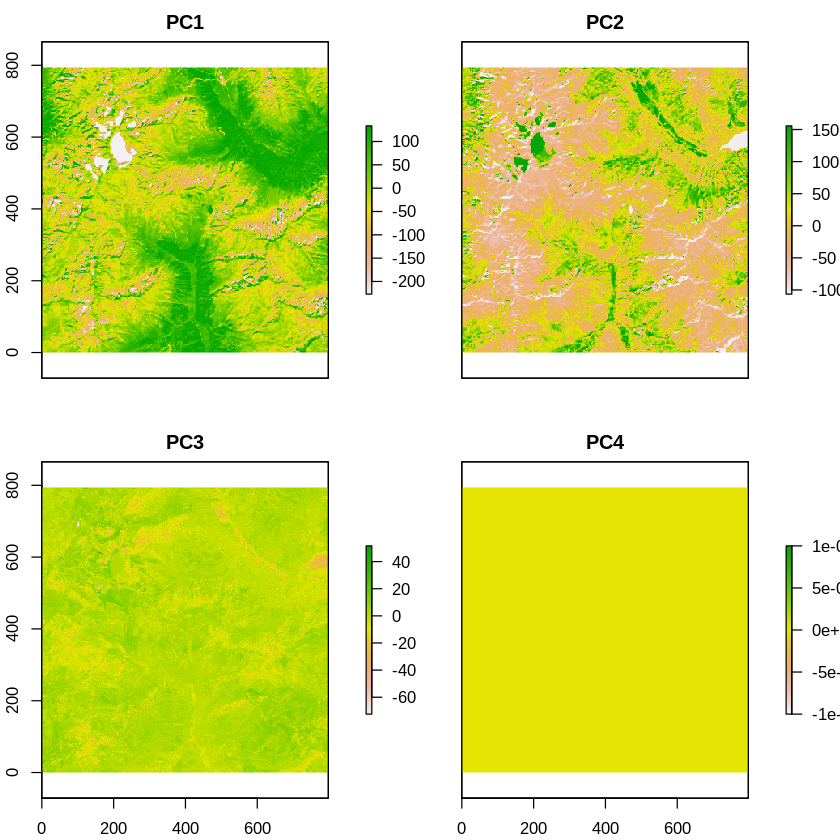

In [21]:
similaun_glacier.pca <- RStoolbox::rasterPCA(similaun_glacier)
plot(similaun_glacier.pca$map)

In [22]:
summary(similaun_glacier.pca$model)
# the first PC contains 67.36804% of the original information

Importance of components:
                           Comp.1     Comp.2      Comp.3 Comp.4
Standard deviation     77.3362848 53.5145531 5.765599616      0
Proportion of Variance  0.6736804  0.3225753 0.003744348      0
Cumulative Proportion   0.6736804  0.9962557 1.000000000      1

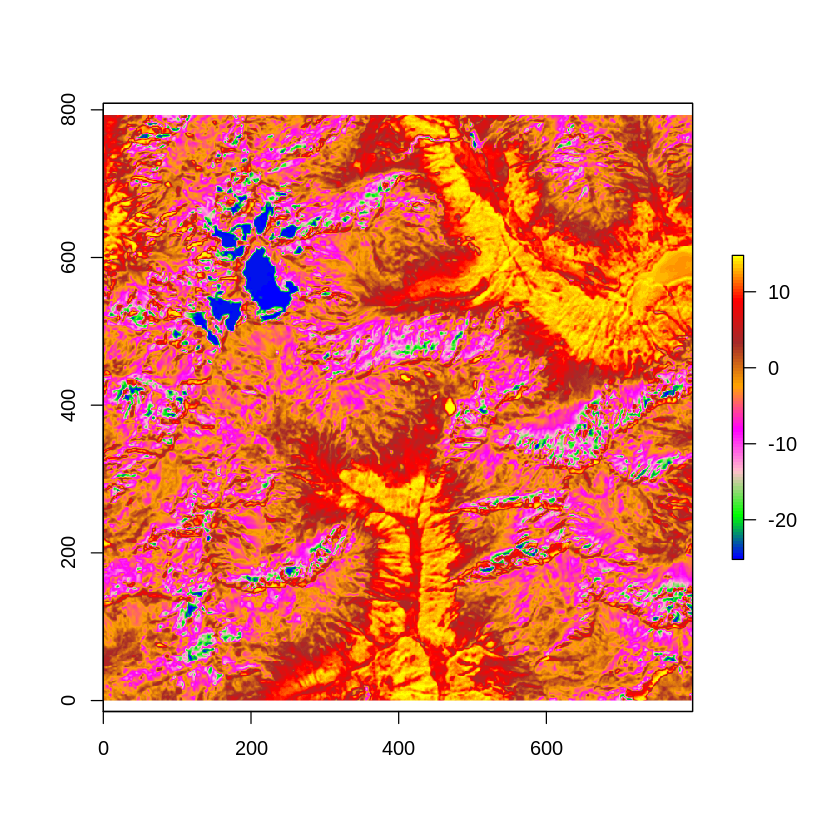

In [33]:
pc1 <- similaun_glacier.pca$map$PC1
pc1.mean3 <- focal(pc1, w=matrix(1/9, nrow=3, ncol=3), fun=mean)
cl_mean <- colorRampPalette(c('blue','green','pink','magenta','orange','brown','red','yellow'))(100) 
plot(pc1.mean3, col=cl_mean)

Use the [ggRGB](https://www.rdocumentation.org/packages/RStoolbox/versions/0.2.6/topics/ggRGB) function of the `ggplot2` package to improve the aesthetics of RGB plots.
With [grid.arrange](https://www.rdocumentation.org/packages/pdp/versions/0.7.0/topics/grid.arrange) one can reproduce the behaviour of the base functions `par(mfrow=c(r,c))` specifying either the number of rows or columns.

In [ ]:
# The package contains eight color scales: “viridis”, the primary choice, and five alternatives with similar properties - “magma”, “plasma”, “inferno”, “cividis”, “mako”, and “rocket” -, and a rainbow color map - “turbo”.
p0 <- ggplot() + geom_raster(pc1.mean3, mapping = aes(x = x, y = y, fill = layer)) + scale_fill_viridis() +  ggtitle("viridis palette")
p1 <- ggplot() + geom_raster(pc1.mean3, mapping = aes(x = x, y = y, fill = layer)) + scale_fill_viridis(option="magma") +  ggtitle("magma palette")
p2 <- ggplot() + geom_raster(pc1.mean3, mapping = aes(x = x, y = y, fill = layer)) + scale_fill_viridis(option="plasma") +  ggtitle("plasma palette")
p3 <- ggplot() + geom_raster(pc1.mean3, mapping = aes(x = x, y = y, fill = layer)) + scale_fill_viridis(option="inferno") +  ggtitle("inferno palette")
p4 <- ggplot() + geom_raster(pc1.mean3, mapping = aes(x = x, y = y, fill = layer)) + scale_fill_viridis(option="cividis") +  ggtitle("cividis palette")
p5 <- ggplot() + geom_raster(pc1.mean3, mapping = aes(x = x, y = y, fill = layer)) + scale_fill_viridis(option="mako") +  ggtitle("mako palette")
p6 <- ggplot() + geom_raster(pc1.mean3, mapping = aes(x = x, y = y, fill = layer)) + scale_fill_viridis(option="rocket") + ggtitle("rocket palette")
p7 <- ggplot() + geom_raster(pc1.mean3, mapping = aes(x = x, y = y, fill = layer)) + scale_fill_viridis(option="turbo") + ggtitle("turbo palette")

In [ ]:
pdf(file = "/content/Similaun_different_color.pdf")
grid.arrange(p0, p1, p2, p3, p4, p5, p6, p7, ncol=2) 
dev.off()

In [ ]:
pc1.sd3 <- focal(pc1, w=matrix(1/9, nrow=3, ncol=3), fun=sd)
cl_sd <- colorRampPalette(c('blue','green','pink','magenta','orange','brown','red','yellow'))(100) 
plot(pc1.sd3, col=cl_sd)

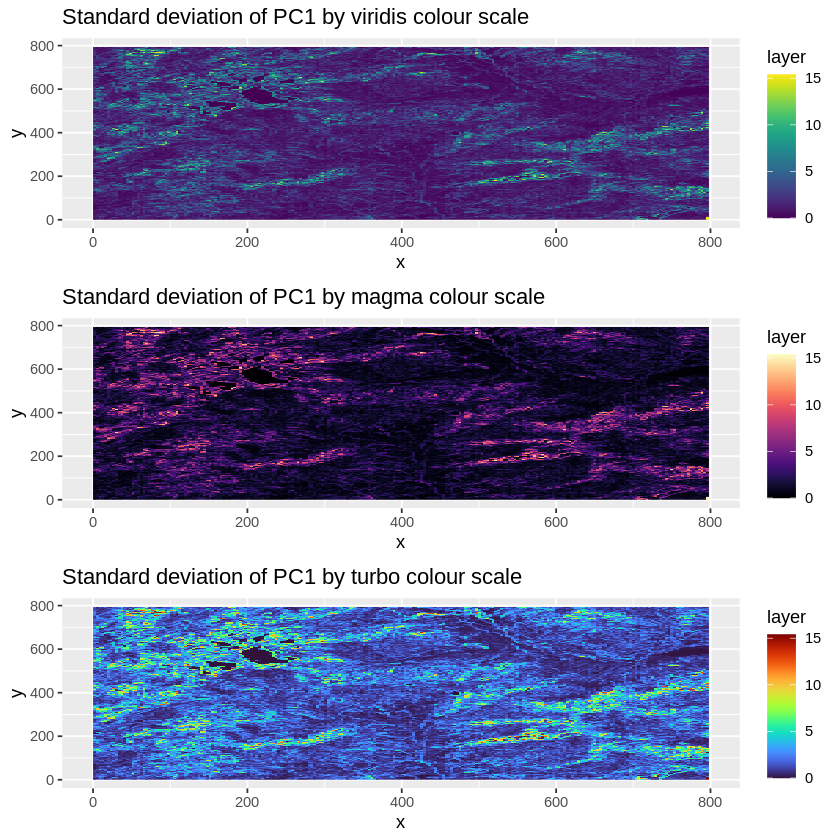

In [42]:
p1 <- ggplot() +
geom_raster(pc1.sd3, mapping = aes(x = x, y = y, fill = layer)) +
scale_fill_viridis() +
ggtitle("Standard deviation of PC1 by viridis colour scale")

p2 <- ggplot() +
geom_raster(pc1.sd3, mapping = aes(x = x, y = y, fill = layer)) +
scale_fill_viridis(option = "magma") +
ggtitle("Standard deviation of PC1 by magma colour scale")

p3 <- ggplot() +
geom_raster(pc1.sd3, mapping = aes(x = x, y = y, fill = layer)) +
scale_fill_viridis(option = "turbo") +
ggtitle("Standard deviation of PC1 by turbo colour scale")

grid.arrange(p1, p2, p3, ncol = 1)